In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

2024-01-11 14:44:47.551091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 14:44:47.589205: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 14:44:47.589236: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 14:44:47.589265: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 14:44:47.595953: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-11 14:44:47.596569: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [ ]:
csv = pd.read_csv('datasets/Iowa_Liquor_Sales.csv')

In [2]:
def plot_deezz_long(x,y):
    plt.figure(figsize=(100,20))
    plt.plot(x,y)

def normalizer(dataframe):

    return (dataframe - np.min(dataframe)) / (np.max(dataframe) - np.min(dataframe) )
    # return tf.keras.utils.normalize(dataframe)
    # return (dataframe - dataframe.min()) / (dataframe.max() - dataframe.min() )  

In [3]:
df = pd.read_csv('datasets/newlongIowaLiqourfixed.csv',index_col=[0],parse_dates=[1])

In [5]:
df.columns

Index(['Date', 'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [6]:
df.shape

(27280529, 11)

In [7]:
df.dtypes

Date                   datetime64[ns]
Category                      float64
Category Name                  object
Vendor Number                 float64
Vendor Name                    object
Item Number                     int64
Bottle Volume (ml)              int64
State Bottle Cost             float64
State Bottle Retail           float64
Bottles Sold                    int64
Sale (Dollars)                float64
dtype: object

In [15]:
df.head(10)

,Date,Category,Category Name,Vendor Number,Vendor Name,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
3320681,2012-01-03,1011300.0,TENNESSEE WHISKIES,85.0,BROWN-FORMAN CORPORATION,26827,1000,16.43,24.64,2,49.28
3564553,2012-01-03,1081390.0,IMPORTED SCHNAPPS,260.0,DIAGEO AMERICAS,69945,375,6.50,9.74,2,19.48
3778747,2012-01-03,1011200.0,STRAIGHT BOURBON WHISKIES,259.0,HEAVEN HILL BRANDS,73715,750,7.94,11.91,2,23.82
3780616,2012-01-03,1011100.0,BLENDED WHISKIES,65.0,JIM BEAM BRANDS,24456,750,5.51,8.26,4,33.04
3781145,2012-01-03,1031080.0,VODKA 80 PROOF,260.0,DIAGEO AMERICAS,37994,375,4.48,6.72,24,161.28
...,...,...,...,...,...,...,...,...,...,...,...
24290419,2012-01-03,1011300.0,TENNESSEE WHISKIES,85.0,BROWN-FORMAN CORPORATION,26827,1000,16.43,24.64,12,295.68
24294923,2012-01-03,1011200.0,STRAIGHT BOURBON WHISKIES,65.0,JIM BEAM BRANDS,27544,750,9.97,14.95,12,179.40
24297895,2012-01-03,1031080.0,VODKA 80 PROOF,260.0,DIAGEO AMERICAS,37997,1000,8.49,12.74,2,25.48
24300132,2012-01-03,1032080.0,IMPORTED VODKAS,35.0,"BACARDI U.S.A., INC.",34422,1000,21.77,32.66,2,65.32


In [4]:
mindate, maxdate = df.Date.min() ,df.Date.max()
mindate, maxdate

(Timestamp('2012-01-03 00:00:00'), Timestamp('2023-08-31 00:00:00'))

In [5]:
def get_sales_per_day():
    ndf = df.groupby('Date')['Sale (Dollars)'].sum().reset_index()
    dates = pd.date_range(mindate,maxdate)
    missed_dates = sorted(list(set(dates) - set(ndf['Date'])))
    for i in missed_dates:
        ndf.loc[len(ndf)] = [i,0]
    
    return ndf.sort_values('Date').reset_index(drop=True)
ndf = get_sales_per_day()

In [6]:
ndf.head(10)

,Date,Sale (Dollars)
0,2012-01-03,1012493.81
1,2012-01-04,860053.73
2,2012-01-05,940194.93
3,2012-01-06,0.00
4,2012-01-07,0.00
5,2012-01-08,0.00
6,2012-01-09,933835.50
7,2012-01-10,900077.61
8,2012-01-11,773739.73
9,2012-01-12,927338.66


In [ ]:
plot_deezz_long(ndf['date'],ndf['sales'])

In [ ]:
df['Category Name'].value_counts()

In [ ]:
dfsorted = df.sort_values('Date')


In [ ]:
dfsorted.head()

In [ ]:
dfsorted[dfsorted['Date'] == '2012-01-03'].shape,dfsorted[dfsorted['Date'] == '2012-01-04'].shape

In [ ]:
mindate,maxdate

In [ ]:
def get_length_per_date():
    current_date = mindate
    d =  dfsorted.value_counts('Date')
    ndataframe = pd.DataFrame(
        {
            'dates': d.keys(),
            'length' : d.values
        }
    )
    lofdates = ndataframe['dates'].tolist()
    while current_date <= maxdate:
        if current_date not in lofdates:
            ndataframe.loc[len(ndataframe)] = [current_date,0]
            print(current_date)
        current_date += pd.Timedelta(days=1)
    return ndataframe.sort_values('dates').reset_index(drop=True)


In [ ]:
getlenperdate = get_length_per_date()
getlenperdate.head()

In [ ]:
def showPlot_per_year():
    current_year = mindate.year
    while current_year <= maxdate.year:
        plt.figure(figsize=(30,10))
        plt.title(str(current_year))
        plt.plot(getlenperdate.set_index('dates').loc[str(current_year)])
        current_year += 1


In [ ]:
showPlot_per_year()

In [ ]:
def similarities_per_year(fromyear,toyear):
    d = pd.DataFrame(
        columns=[
            str(i) for i in range(fromyear,toyear+1)
        ]
    )
    
    for i in range(fromyear,toyear+1):
        d[str(i)] = getlenperdate.set_index('dates').loc[str(i)].reset_index(drop=True)    

    return d.fillna(0)

In [ ]:
similarities_per_year(2012,2013).plot(figsize=(200,10),legend=True)

In [ ]:
df.head(10)

In [ ]:
# tables
# date, list of items sold present, total items sold present, total sales present
def get_these_tables():
    newdataframe = pd.DataFrame(
        columns=[
            'date',                         #date
            'list of items sold present',   #[list of category name]
            'total items sold present',     #total items sold in a day
            'total sales present',          #total sales in a day
            # *list(df['Category Name'].value_counts().keys().sort_values())
        ]
    )
    current_date = mindate
    while current_date <= maxdate:
        now =  df[df['Date'] == current_date]
        lnames = now['Category Name']
        newdataframe.loc[len(newdataframe.index)] = [
            current_date,
            list(set(lnames)),
            len(lnames),
            np.sum(now['Sale (Dollars)'])
        ]
        print(current_date)
        current_date = current_date + pd.Timedelta(days=1)
    return newdataframe
    
    

In [ ]:
# tbased = get_these_tables()
tbased = pd.read_csv('datasets/saveprogress-getthesetables.csv',).drop(columns=['Unnamed: 0'])


In [ ]:
# tbased.to_csv('saveprogress-getthesetables.csv')

In [ ]:
tbased.head(30)

In [52]:
def create_classifysales():
    newdf =  pd.DataFrame(
        columns=[
            'date',
            *list(df['Category Name'].value_counts().keys().sort_values())
        ]
    )
    newdf['date'] = tbased['date']
    newdf.set_index('date',inplace=True)

    for day in newdf.index:
        now = df[df['Date'] == day]
        cur_row = now['Category Name'].value_counts()
        if not len(cur_row.keys()) == 0:
            for key in cur_row.keys():
                newdf.loc[day][key] = cur_row[key]

    return newdf

# df[df['Date'] == mindate + pd.Timedelta(days=1) ]['Category Name'].value_counts()['VODKA 80 PROOF']
# classifysales =  create_classifysales()
classifysales = pd.read_csv('datasets/saveprogress-classifysales-foreach-category.csv')
# classifysales.set_index('date',inplace=True)
classifysales.drop(columns=['date'],inplace=True)
# print(len(classifysales))
# for i in classifysales.index:
#     if classifysales.loc[i].sum() == 0  :
#         classifysales.drop(index=i,inplace=True)


In [53]:
classifysales.reset_index(drop=True,inplace=True)

In [54]:
classifysales.fillna(0,inplace=True)

In [55]:
# classifysales.to_csv('saveprogress-classifysales-foreach-category.csv')
classifysales.reset_index(drop=True,inplace=True)


In [56]:
for i in classifysales.columns:
    classifysales[str(i)] = classifysales[str(i)].astype('float')

classifysales.dtypes

100 PROOF VODKA          float64
100% AGAVE TEQUILA       float64
AGED DARK RUM            float64
AMARETTO - IMPORTED      float64
AMERICAN ALCOHOL         float64
                          ...   
WATERMELON SCHNAPPS      float64
WHISKEY LIQUEUR          float64
WHITE CREME DE CACAO     float64
WHITE CREME DE MENTHE    float64
WHITE RUM                float64
Length: 103, dtype: object

In [69]:
classifysales

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,110.0,0.0,0.0,0.0,51.0,94.0,0.0,422.0,0.0,0.0,...,428.0,62.0,33.0,1038.0,463.0,35.0,232.0,26.0,1.0,0.0
1,89.0,0.0,0.0,0.0,46.0,78.0,0.0,459.0,0.0,0.0,...,403.0,52.0,39.0,901.0,506.0,36.0,231.0,17.0,1.0,0.0
2,108.0,0.0,0.0,0.0,28.0,63.0,0.0,375.0,0.0,0.0,...,436.0,49.0,10.0,963.0,427.0,26.0,208.0,11.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4255,0.0,300.0,25.0,0.0,0.0,0.0,67.0,0.0,120.0,20.0,...,0.0,21.0,0.0,0.0,0.0,0.0,323.0,0.0,0.0,85.0
4256,0.0,731.0,42.0,0.0,0.0,0.0,344.0,0.0,296.0,43.0,...,0.0,38.0,0.0,0.0,0.0,0.0,962.0,0.0,0.0,223.0
4257,0.0,432.0,37.0,0.0,0.0,0.0,145.0,0.0,204.0,39.0,...,0.0,34.0,0.0,0.0,0.0,0.0,503.0,0.0,0.0,169.0


<Axes: >

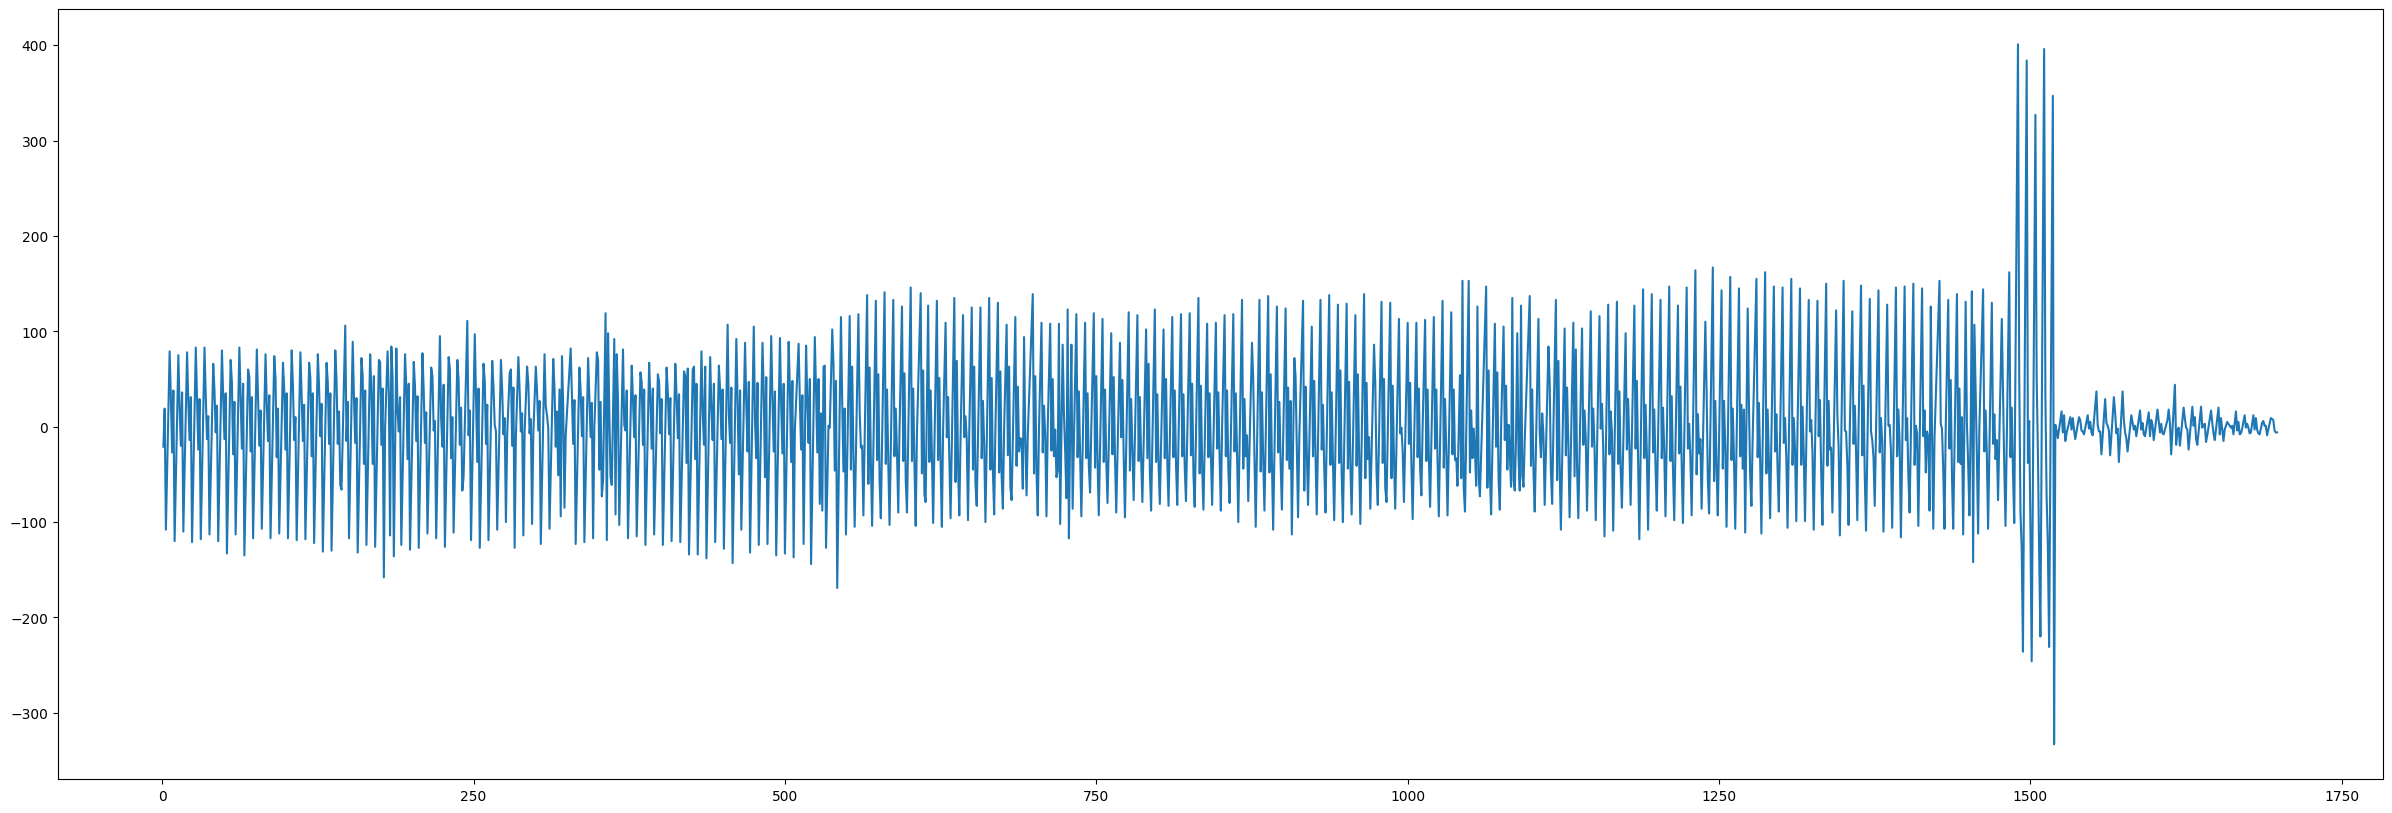

In [70]:
from numpy import NaN


log = classifysales['100 PROOF VODKA'].diff()
# log = log * log.mean()
log.replace([np.inf,-np.inf,0],NaN,inplace=True)
log.dropna(inplace=True)
log.plot(figsize=(30,10),)


<Axes: >

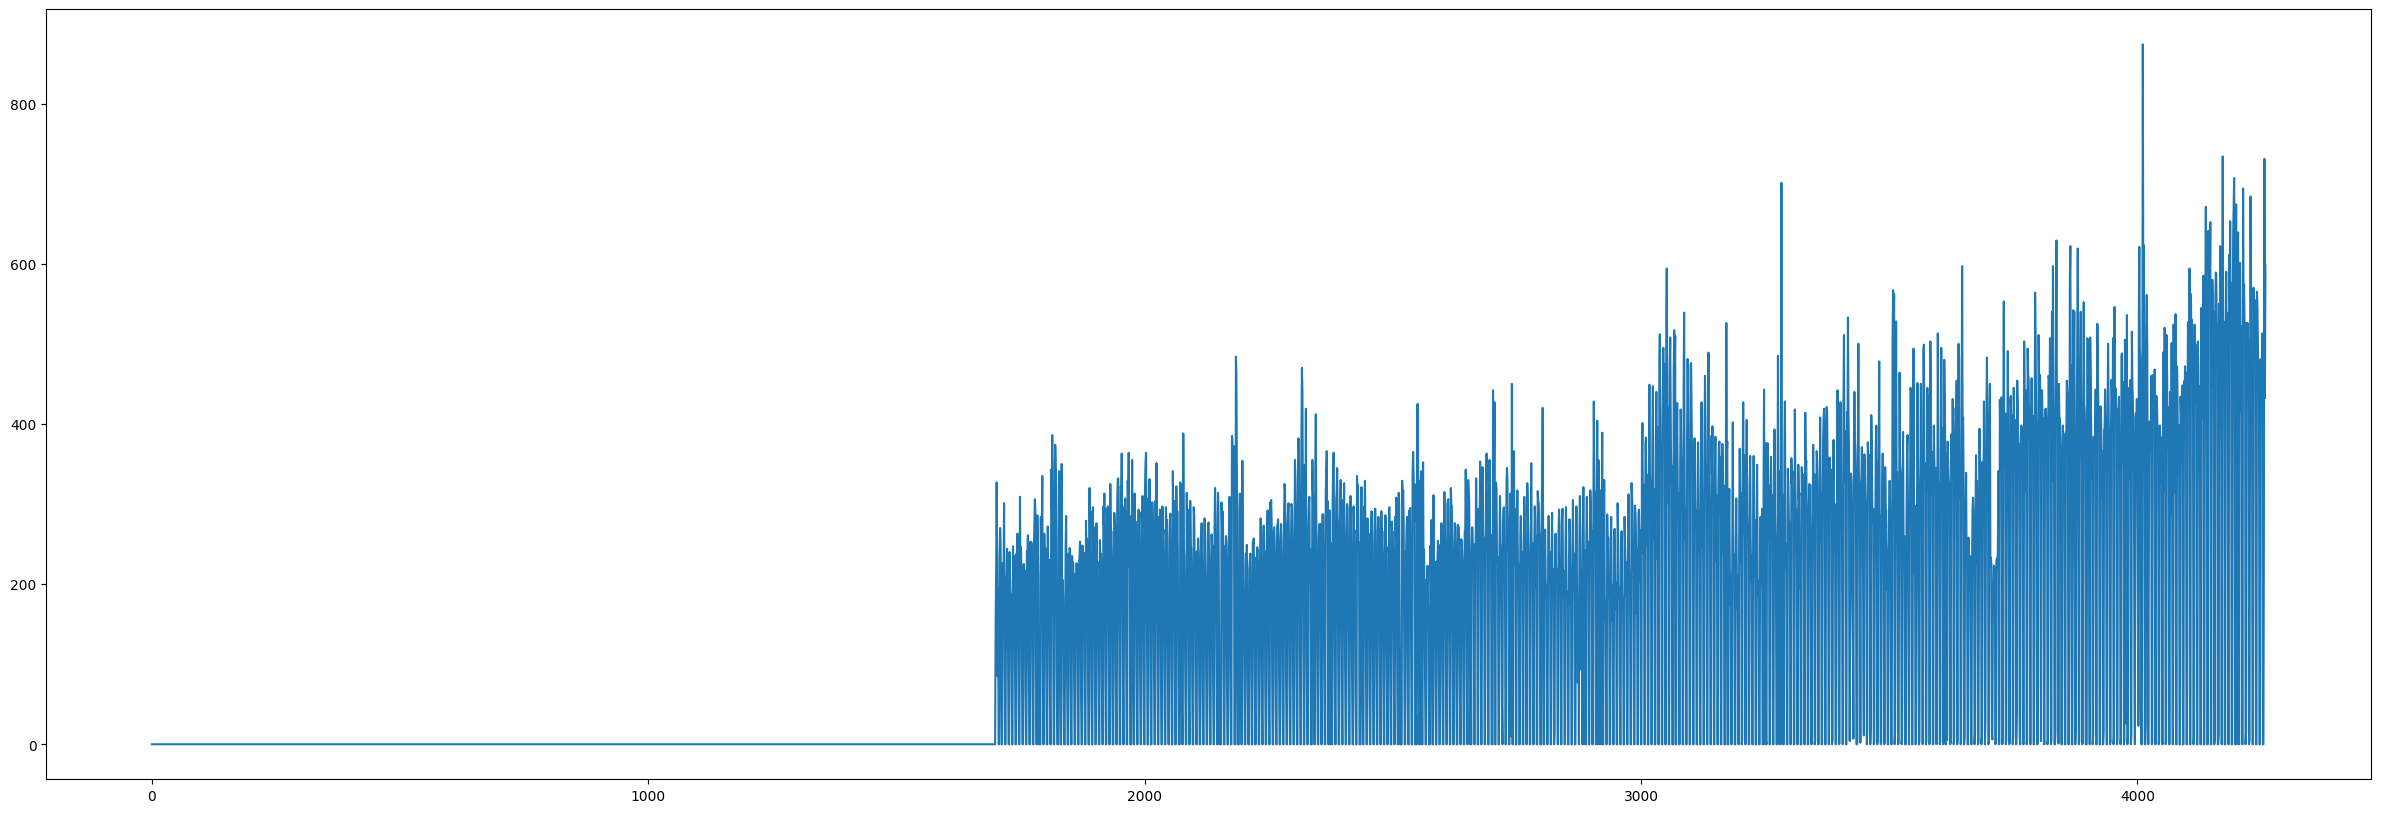

In [71]:
classifysales['100% AGAVE TEQUILA'].plot(figsize=(30,10))

In [72]:
log.shift(1).values

array([ nan, -21.,  19., ...,   7.,  -4.,  -6.])

In [73]:
log = log.reset_index(drop=True)
log = normalizer(log)
# l = [i for i in ]
x = pd.DataFrame(
    data = {str(i) : log.shift(-i) for i in range(7)} 
)
x['ans'] = x['6'].shift(-1)
x.dropna(inplace=True)
y = x.pop('ans')


In [74]:
x[-20:]

,0,1,2,3,4,5,6
1235,0.460490,0.442779,0.444142,0.450954,0.470027,0.452316,0.457766
1236,0.442779,0.444142,0.450954,0.470027,0.452316,0.457766,0.452316
1237,0.444142,0.450954,0.470027,0.452316,0.457766,0.452316,0.444142
1238,0.450954,0.470027,0.452316,0.457766,0.452316,0.444142,0.445504
1239,0.470027,0.452316,0.457766,0.452316,0.444142,0.445504,0.470027
1240,0.452316,0.457766,0.452316,0.444142,0.445504,0.470027,0.449591
1241,0.457766,0.452316,0.444142,0.445504,0.470027,0.449591,0.465940
1242,0.452316,0.444142,0.445504,0.470027,0.449591,0.465940,0.449591
1243,0.444142,0.445504,0.470027,0.449591,0.465940,0.449591,0.444142
1244,0.445504,0.470027,0.449591,0.465940,0.449591,0.444142,0.442779


In [75]:

model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(x.shape[1],1)),#,1
    # tf.keras.layers.Dense(256,activation='relu'),
    # tf.keras.layers.LeakyReLU(),
    # tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(256,activation='relu',),
    # tf.keras.layers.LSTM(256,dropout=0.1),
    # tf.keras.layers.Dense(1,)
    tf.keras.layers.Input(shape=(x.shape[1],1)),#,1
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(256,activation='selu'),
    tf.keras.layers.LeakyReLU(0.8),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256,activation='selu'),
    tf.keras.layers.ELU(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(256,dropout=0.1),
    tf.keras.layers.Dense(1,)
])
model.summary()
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError(),
        tf.keras.metrics.Accuracy(),
        tf.keras.metrics.R2Score(),]
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 7, 256)            512       
                                                                 
 dense_25 (Dense)            (None, 7, 256)            65792     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 7, 256)            0         
                                                                 
 dropout_12 (Dropout)        (None, 7, 256)            0         
                                                                 
 dense_26 (Dense)            (None, 7, 256)            65792     
                                                                 
 elu_6 (ELU)                 (None, 7, 256)            0         
                                                                 
 dropout_13 (Dropout)        (None, 7, 256)           

In [82]:
eval = 0
while eval <= 0.85:
    model.fit(x,y,epochs=1,batch_size=16)
    eval = model.evaluate(x,y)[-1]

40/40 [==============================] - 0s 8ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - accuracy: 0.0000e+00 - r2_score: 0.8575


40/40 [==============================] - 0s 8ms/step


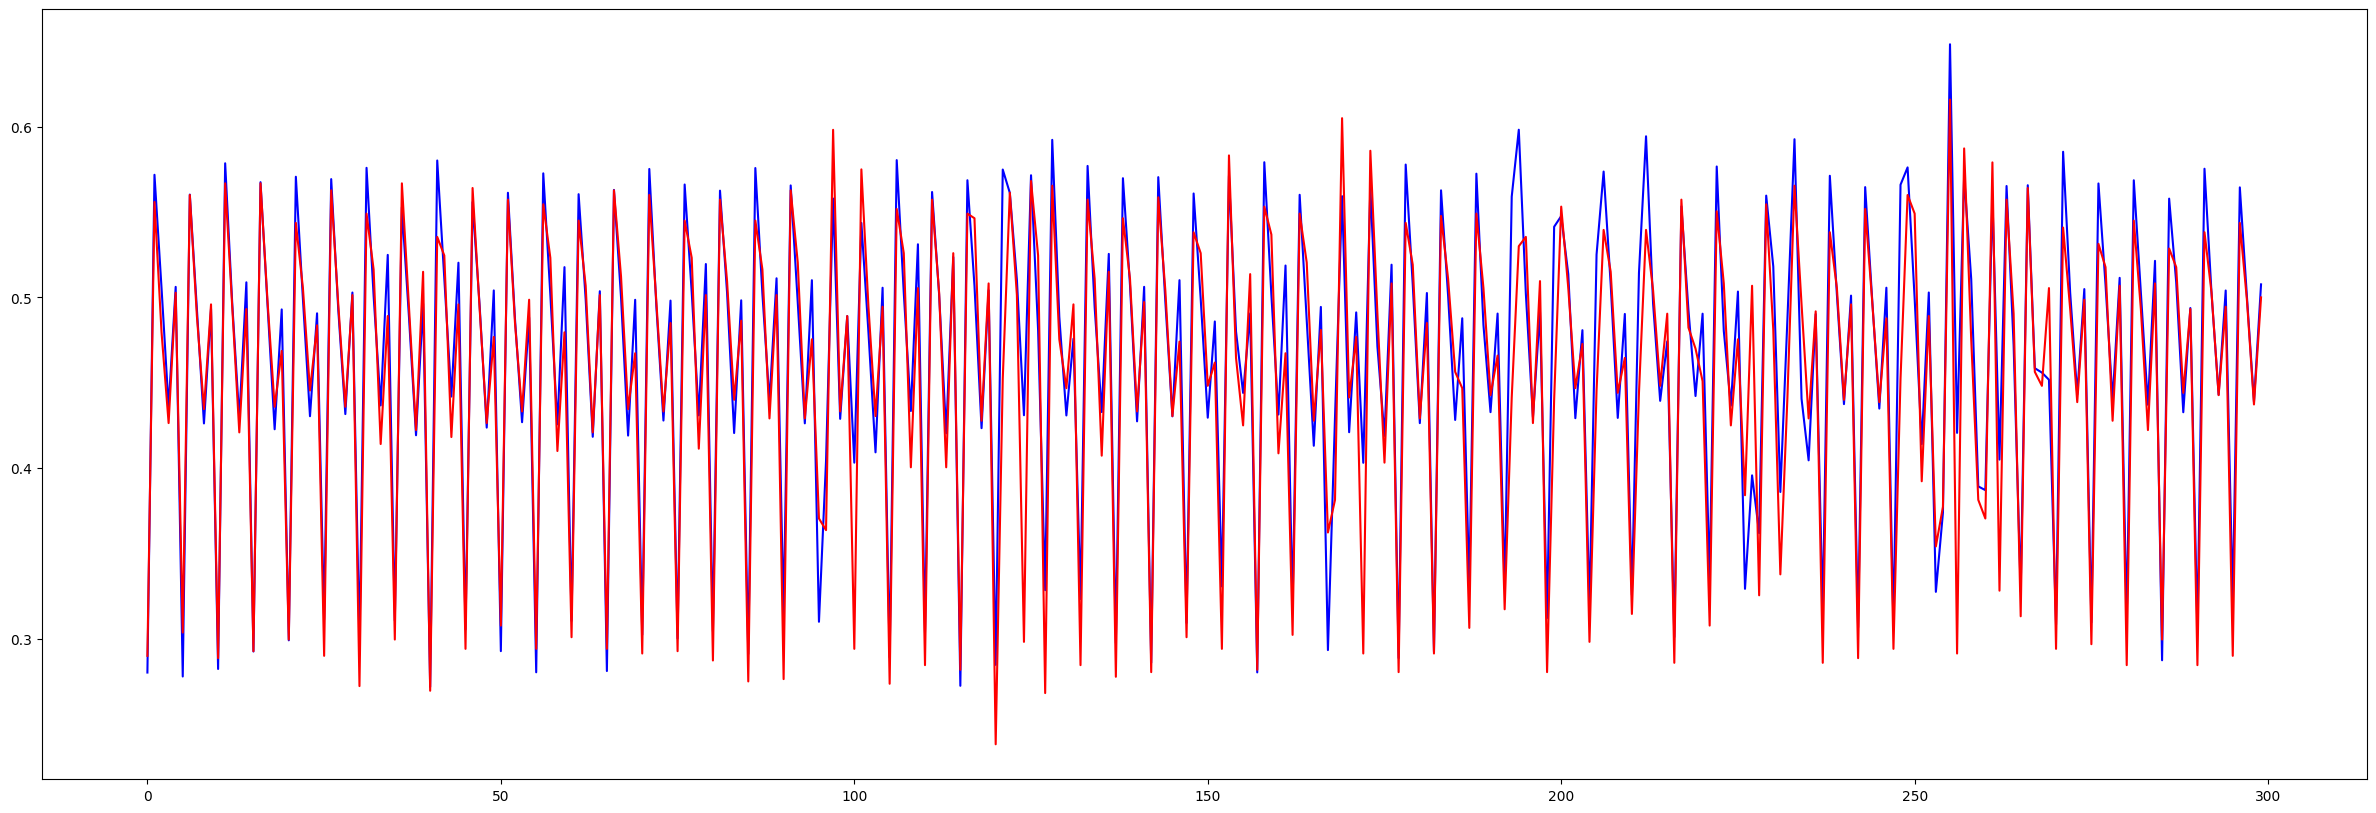

In [88]:
res = model.predict(x)
plt.figure(figsize=(30,10))
plt.plot([i[0] for i in res][:300],'-b')
plt.plot(y[:300],'-r')

In [ ]:
classifysales = normalizer(classifysales)
classifysales

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,0.042835,0.000000,0.000000,0.0,0.019860,0.036604,0.000000,0.164330,0.000000,0.000000,...,0.166667,0.024143,0.012850,0.404206,0.180296,0.013629,0.090343,0.010125,0.000389,0.000000
1,0.034657,0.000000,0.000000,0.0,0.017913,0.030374,0.000000,0.178738,0.000000,0.000000,...,0.156931,0.020249,0.015187,0.350857,0.197040,0.014019,0.089953,0.006620,0.000389,0.000000
2,0.042056,0.000000,0.000000,0.0,0.010903,0.024533,0.000000,0.146028,0.000000,0.000000,...,0.169782,0.019081,0.003894,0.375000,0.166277,0.010125,0.080997,0.004283,0.000779,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4252,0.000000,0.199766,0.008567,0.0,0.000000,0.000000,0.100857,0.000000,0.116822,0.015966,...,0.000000,0.013240,0.000000,0.000000,0.000000,0.000000,0.358645,0.000000,0.000000,0.093069
4253,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4254,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4255,0.000000,0.116822,0.009735,0.0,0.000000,0.000000,0.026090,0.000000,0.046729,0.007788,...,0.000000,0.008178,0.000000,0.000000,0.000000,0.000000,0.125779,0.000000,0.000000,0.033100


In [ ]:
classifysales_Label = classifysales.shift(-1)

In [ ]:
classifysales

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,0.042835,0.000000,0.000000,0.0,0.019860,0.036604,0.000000,0.164330,0.000000,0.000000,...,0.166667,0.024143,0.012850,0.404206,0.180296,0.013629,0.090343,0.010125,0.000389,0.000000
1,0.034657,0.000000,0.000000,0.0,0.017913,0.030374,0.000000,0.178738,0.000000,0.000000,...,0.156931,0.020249,0.015187,0.350857,0.197040,0.014019,0.089953,0.006620,0.000389,0.000000
2,0.042056,0.000000,0.000000,0.0,0.010903,0.024533,0.000000,0.146028,0.000000,0.000000,...,0.169782,0.019081,0.003894,0.375000,0.166277,0.010125,0.080997,0.004283,0.000779,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4254,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4255,0.000000,0.116822,0.009735,0.0,0.000000,0.000000,0.026090,0.000000,0.046729,0.007788,...,0.000000,0.008178,0.000000,0.000000,0.000000,0.000000,0.125779,0.000000,0.000000,0.033100
4256,0.000000,0.284657,0.016355,0.0,0.000000,0.000000,0.133956,0.000000,0.115265,0.016745,...,0.000000,0.014798,0.000000,0.000000,0.000000,0.000000,0.374611,0.000000,0.000000,0.086838


In [ ]:
classifysales_Label

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,0.034657,0.000000,0.000000,0.0,0.017913,0.030374,0.000000,0.178738,0.000000,0.000000,...,0.156931,0.020249,0.015187,0.350857,0.197040,0.014019,0.089953,0.006620,0.000389,0.000000
1,0.042056,0.000000,0.000000,0.0,0.010903,0.024533,0.000000,0.146028,0.000000,0.000000,...,0.169782,0.019081,0.003894,0.375000,0.166277,0.010125,0.080997,0.004283,0.000779,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4253,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4254,0.000000,0.116822,0.009735,0.0,0.000000,0.000000,0.026090,0.000000,0.046729,0.007788,...,0.000000,0.008178,0.000000,0.000000,0.000000,0.000000,0.125779,0.000000,0.000000,0.033100
4255,0.000000,0.284657,0.016355,0.0,0.000000,0.000000,0.133956,0.000000,0.115265,0.016745,...,0.000000,0.014798,0.000000,0.000000,0.000000,0.000000,0.374611,0.000000,0.000000,0.086838
4256,0.000000,0.168224,0.014408,0.0,0.000000,0.000000,0.056464,0.000000,0.079439,0.015187,...,0.000000,0.013240,0.000000,0.000000,0.000000,0.000000,0.195872,0.000000,0.000000,0.065810


In [ ]:
classifysales_Label.dtypes

100 PROOF VODKA          float64
100% AGAVE TEQUILA       float64
AGED DARK RUM            float64
AMARETTO - IMPORTED      float64
AMERICAN ALCOHOL         float64
                          ...   
WATERMELON SCHNAPPS      float64
WHISKEY LIQUEUR          float64
WHITE CREME DE CACAO     float64
WHITE CREME DE MENTHE    float64
WHITE RUM                float64
Length: 103, dtype: object

In [ ]:
classifysales.tail()

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
4253,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4254,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4255,0.0,0.116822,0.009735,0.0,0.0,0.0,0.026090,0.0,0.046729,0.007788,...,0.0,0.008178,0.0,0.0,0.0,0.0,0.125779,0.0,0.0,0.033100
4256,0.0,0.284657,0.016355,0.0,0.0,0.0,0.133956,0.0,0.115265,0.016745,...,0.0,0.014798,0.0,0.0,0.0,0.0,0.374611,0.0,0.0,0.086838
4257,0.0,0.168224,0.014408,0.0,0.0,0.0,0.056464,0.0,0.079439,0.015187,...,0.0,0.013240,0.0,0.0,0.0,0.0,0.195872,0.0,0.0,0.065810


In [ ]:
classifysales_Label.dropna(inplace=True)
classifysales_Label.tail()

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
4252,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4253,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4254,0.0,0.116822,0.009735,0.0,0.0,0.0,0.026090,0.0,0.046729,0.007788,...,0.0,0.008178,0.0,0.0,0.0,0.0,0.125779,0.0,0.0,0.033100
4255,0.0,0.284657,0.016355,0.0,0.0,0.0,0.133956,0.0,0.115265,0.016745,...,0.0,0.014798,0.0,0.0,0.0,0.0,0.374611,0.0,0.0,0.086838
4256,0.0,0.168224,0.014408,0.0,0.0,0.0,0.056464,0.0,0.079439,0.015187,...,0.0,0.013240,0.0,0.0,0.0,0.0,0.195872,0.0,0.0,0.065810


In [ ]:
classifysales.shape,classifysales_Label.shape

((4258, 103), (4257, 103))

In [ ]:
classifysales = classifysales.iloc[:-1,:]

In [ ]:
classifysales.shape,classifysales_Label.shape

((4257, 103), (4257, 103))

In [ ]:
classifysales.tail(10)

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
4247,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4248,0.0,0.168614,0.010514,0.0,0.0,0.0,0.085280,0.0,0.079050,0.011682,...,0.0,0.008567,0.0,0.0,0.0,0.0,0.254673,0.0,0.0,0.058801
4249,0.0,0.187305,0.007788,0.0,0.0,0.0,0.092679,0.0,0.091121,0.013240,...,0.0,0.010125,0.0,0.0,0.0,0.0,0.252336,0.0,0.0,0.062695
4250,0.0,0.181854,0.011293,0.0,0.0,0.0,0.069315,0.0,0.089953,0.019470,...,0.0,0.018302,0.0,0.0,0.0,0.0,0.235592,0.0,0.0,0.074766
4251,0.0,0.168224,0.008178,0.0,0.0,0.0,0.064252,0.0,0.077492,0.011293,...,0.0,0.012072,0.0,0.0,0.0,0.0,0.170561,0.0,0.0,0.056464
4252,0.0,0.199766,0.008567,0.0,0.0,0.0,0.100857,0.0,0.116822,0.015966,...,0.0,0.013240,0.0,0.0,0.0,0.0,0.358645,0.0,0.0,0.093069
4253,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4254,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
4255,0.0,0.116822,0.009735,0.0,0.0,0.0,0.026090,0.0,0.046729,0.007788,...,0.0,0.008178,0.0,0.0,0.0,0.0,0.125779,0.0,0.0,0.033100
4256,0.0,0.284657,0.016355,0.0,0.0,0.0,0.133956,0.0,0.115265,0.016745,...,0.0,0.014798,0.0,0.0,0.0,0.0,0.374611,0.0,0.0,0.086838


In [ ]:
classifysales_Label.isnull().any()

100 PROOF VODKA          False
100% AGAVE TEQUILA       False
AGED DARK RUM            False
AMARETTO - IMPORTED      False
AMERICAN ALCOHOL         False
                         ...  
WATERMELON SCHNAPPS      False
WHISKEY LIQUEUR          False
WHITE CREME DE CACAO     False
WHITE CREME DE MENTHE    False
WHITE RUM                False
Length: 103, dtype: bool

In [ ]:
target = int(len(classifysales) * 0.8)
xtrain = classifysales[ : target]
ytrain = classifysales_Label[ : target]

xtest = classifysales[target :]
ytest = classifysales_Label[target :]

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Input(classifysales.columns.__len__()),
        tf.keras.layers.Dense(103*15, activation='relu'),
        # tf.keras.layers.LeakyReLU(alpha=0.01),#512
        tf.keras.layers.Dense(classifysales.columns.__len__(),activation='relu')
    ],)

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.MeanAbsoluteError(),
        metrics=tf.keras.metrics.MeanAbsolutePercentageError(),

)
    


In [ ]:
model.fit(xtrain.to_numpy() ,ytrain.to_numpy(),epochs=100,shuffle=False,)

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 1545)              160680    
                                                                 
 dense_166 (Dense)           (None, 103)               159238    
                                                                 
Total params: 319918 (1.22 MB)
Trainable params: 319918 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
p = 4
res = model.predict(xtest.to_numpy()[p].reshape(1,len(classifysales.columns)))
# classifysales_Label.to_numpy()[5]

print((res[0] * np.max(d)).sum() )
print((classifysales.loc[p] * np.max(d)).sum() )

# l = [
#    model.predict(classifysales.to_numpy()[i].reshape(1,len(classifysales.columns)))[0] for i in range(100)
# ]

print('{:<40} {:<40} {:<40}'.format('predicted','actual','input'))
for i in range(0,len(res[0])):
    # print('{:<40} {:<40} {:<40}'.format(res[0][i] * np.max(d)    , ytest.to_numpy()[p][i]* np.max(d) ,xtest.to_numpy()[p][i]* np.max(d)))
    print('{:<40} {:<40} {:<40}'.format(res[0][i] , ytest.to_numpy()[p][i] ,xtest.to_numpy()[p][i]))



1/1 [==============================] - 0s 30ms/step
11141894.0
0.0
predicted                                actual                                   input                                   
0.0                                      0.0                                      0.0                                     
286.60858154296875                       353.0                                    328.0                                   
0.0                                      48.0                                     42.0                                    
0.0                                      0.0                                      0.0                                     
0.0                                      0.0                                      0.0                                     
0.0                                      0.0                                      0.0                                     
0.0                                      209.0                          

In [ ]:
(model.evaluate(xtest,ytest)[0] -1) * 100  

27/27 [==============================] - 0s 2ms/step - loss: 40.5512 - mean_absolute_error: 40.5512


3955.1239013671875

In [ ]:
classifysales[:3]

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,0.042835,0.0,0.0,0.0,0.019860,0.036604,0.0,0.164330,0.0,0.0,...,0.166667,0.024143,0.012850,0.404206,0.180296,0.013629,0.090343,0.010125,0.000389,0.0
1,0.034657,0.0,0.0,0.0,0.017913,0.030374,0.0,0.178738,0.0,0.0,...,0.156931,0.020249,0.015187,0.350857,0.197040,0.014019,0.089953,0.006620,0.000389,0.0
2,0.042056,0.0,0.0,0.0,0.010903,0.024533,0.0,0.146028,0.0,0.0,...,0.169782,0.019081,0.003894,0.375000,0.166277,0.010125,0.080997,0.004283,0.000779,0.0


In [ ]:
classifysales_Label[:3]

,100 PROOF VODKA,100% AGAVE TEQUILA,AGED DARK RUM,AMARETTO - IMPORTED,AMERICAN ALCOHOL,AMERICAN AMARETTO,AMERICAN BRANDIES,AMERICAN COCKTAILS,AMERICAN CORDIALS & LIQUEURS,AMERICAN DISTILLED SPIRITS SPECIALTY,...,TEQUILA,TRIPLE SEC,TROPICAL FRUIT SCHNAPPS,VODKA 80 PROOF,VODKA FLAVORED,WATERMELON SCHNAPPS,WHISKEY LIQUEUR,WHITE CREME DE CACAO,WHITE CREME DE MENTHE,WHITE RUM
0,0.034657,0.0,0.0,0.0,0.017913,0.030374,0.0,0.178738,0.0,0.0,...,0.156931,0.020249,0.015187,0.350857,0.197040,0.014019,0.089953,0.006620,0.000389,0.0
1,0.042056,0.0,0.0,0.0,0.010903,0.024533,0.0,0.146028,0.0,0.0,...,0.169782,0.019081,0.003894,0.375000,0.166277,0.010125,0.080997,0.004283,0.000779,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [ ]:
model.evaluate(classifysales,classifysales_Label,) 

  1/134 [..............................] - ETA: 2s - loss: 36.1933 - mean_absolute_percentage_error: 36.1933

134/134 [==============================] - 0s 2ms/step - loss: 33.7325 - mean_absolute_percentage_error: 33.7325


[33.73252487182617, 33.73252487182617]

In [ ]:
# model.save('forecasting_model-per-item.keras')

In [ ]:
# conveter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = conveter.convert()
# 
# Save the model.
# with open('forecasting_model-per-item.tflite', 'wb') as f:
    # f.write(tflite_model)